### Multiclass classification with Fashion‑MNIST

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

Load dataset for teaching model

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


normalize pictures from 0-255 to 0-1

In [3]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

create model: input (28 x 28)- model gets picture. Fkatten - makes matrix(28 x 28) to vector from 784 numbers. Dense(128, ReLu) - hidden layer, ReLu allows un linear things. Dense(10, softmax) - 10 neurons - 10 class. softmax gives probability for each class

In [4]:
model = tf.keras.Sequential([
 tf.keras.layers.Input(shape=(28, 28)),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation="relu"),
 tf.keras.layers.Dense(10, activation="softmax")
])

adam optimazer, accuracy gives probability. 

In [5]:
model.compile(
 loss="sparse_categorical_crossentropy", # labels are ints, not one-hot
 optimizer="adam",
 metrics=["accuracy"]
)


fit: 10 epochs, 10% train data(validation)

In [6]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=0)

test

In [7]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", acc)

Test accuracy: 0.867900013923645


8 test pictures, predict gives probability of each class. argmax - number of class with higher probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


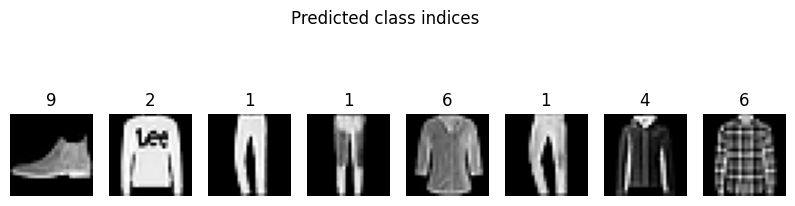

In [8]:
preds = model.predict(x_test[:8]).argmax(axis=1)
plt.figure(figsize=(10,3))
for i in range(8):
 plt.subplot(1,8,i+1)
 plt.imshow(x_test[i], cmap='gray')
 plt.title(int(preds[i]))
 plt.axis('off')
plt.suptitle("Predicted class indices"); plt.show()